origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [1]:
%matplotlib inline
from __future__ import print_function

# 自定义nn模块
当需要定制一个比现有模块序列更复杂的模型时，可以通过继承**nn.Module**自定义模块。在该模块中需要实现**forward**函数，该函数接收输入变量，然后使用其他的模块或自动求导运算来计算输出变量。

下面的例子将实现一个自定义的两层网络模块：

In [2]:
import torch
from torch.autograd import Variable

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        在构造函数中，我们将实例化两个 nn.Linear 模块，并将其设置为成员变量。
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        """
        在forward函数中，接收一个变量作为输入数据，并返回一个变量作为输出数据。
        在该函数中可以使用构造函数中定义的模块和任意变量运算。
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建存储输入和输出的张量，并将他们封装到变量中
x = Variable(torch.randn(N, D_in)) # 默认情况下，requires_grad为False
y = Variable(torch.randn(N, D_out), requires_grad=False)

# 用自定义模块来实例化模型
model = TwoLayerNet(D_in, H, D_out)

# 构造损失函数和优化器。SGD构造器中的model.parameters()包含模型中两个nn.Linear模块
# 中所有的可学习参数。
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

losses = []

for t in range(500):
    # 前馈：将x传递个模型，计算y的预测值
    y_pred = model(x)
    
    # 计算和打印损失
    loss = criterion(y_pred, y)
    print(t, loss.data[0])
    
    losses.append(loss.data[0])
    
    # 清零梯度，执行反向传播，更新权重
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 712.599731445
1 658.18939209
2 611.4765625
3 570.972412109
4 535.074035645
5 502.670074463
6 473.146606445
7 446.041168213
8 420.979949951
9 397.552612305
10 375.559967041
11 354.985321045
12 335.708343506
13 317.471099854
14 300.137390137
15 283.648223877
16 268.040008545
17 253.251037598
18 239.164703369
19 225.784957886
20 213.020248413
21 200.876449585
22 189.351196289
23 178.420257568
24 168.051757812
25 158.222305298
26 148.889480591
27 140.025268555
28 131.635971069
29 123.729789734
30 116.279586792
31 109.249794006
32 102.62171936
33 96.3817367554
34 90.5264511108
35 85.0368118286
36 79.877204895
37 75.0289382935
38 70.4851379395
39 66.2298126221
40 62.2411384583
41 58.5101776123
42 55.0083999634
43 51.7241668701
44 48.6459121704
45 45.7649116516
46 43.054851532
47 40.5177879333
48 38.142250061
49 35.9157829285
50 33.8289489746
51 31.8758869171
52 30.0397434235
53 28.3198471069
54 26.7035140991
55 25.1856155396
56 23.7611541748
57 22.42237854
58 21.1672019958
59 19.9864234924

481 1.08191889012e-05
482 1.05503022496e-05
483 1.02857684396e-05
484 1.00290908449e-05
485 9.77826402959e-06
486 9.534865967e-06
487 9.2969103207e-06
488 9.06605873752e-06
489 8.84033488546e-06
490 8.62008164404e-06
491 8.40564825921e-06
492 8.19724118628e-06
493 7.99396639195e-06
494 7.79520451033e-06
495 7.60203238315e-06
496 7.41371786717e-06
497 7.2296666076e-06
498 7.05079446561e-06
499 6.87646434017e-06


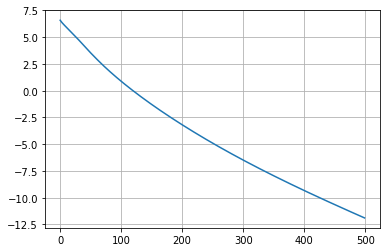

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log(losses))
plt.grid()